In [21]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('hypothyroid.arff')
df = pd.DataFrame(data[0])

df.head()


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b't',125.0,b't',1.14,b't',109.0,b'f',NaN,b'SVHC',b'P'
1,23.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b't',102.0,b'f',NaN,b'f',NaN,b'f',NaN,b'other',b'P'
2,46.0,b'M',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b't',109.0,b't',0.91,b't',120.0,b'f',NaN,b'other',b'P'
3,70.0,b'F',b't',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b't',175.0,b'f',NaN,b'f',NaN,b'f',NaN,b'other',b'P'
4,70.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b't',61.0,b't',0.87,b't',70.0,b'f',NaN,b'SVI',b'P'


Observem visualment si hi ha valors que falten

<AxesSubplot:>

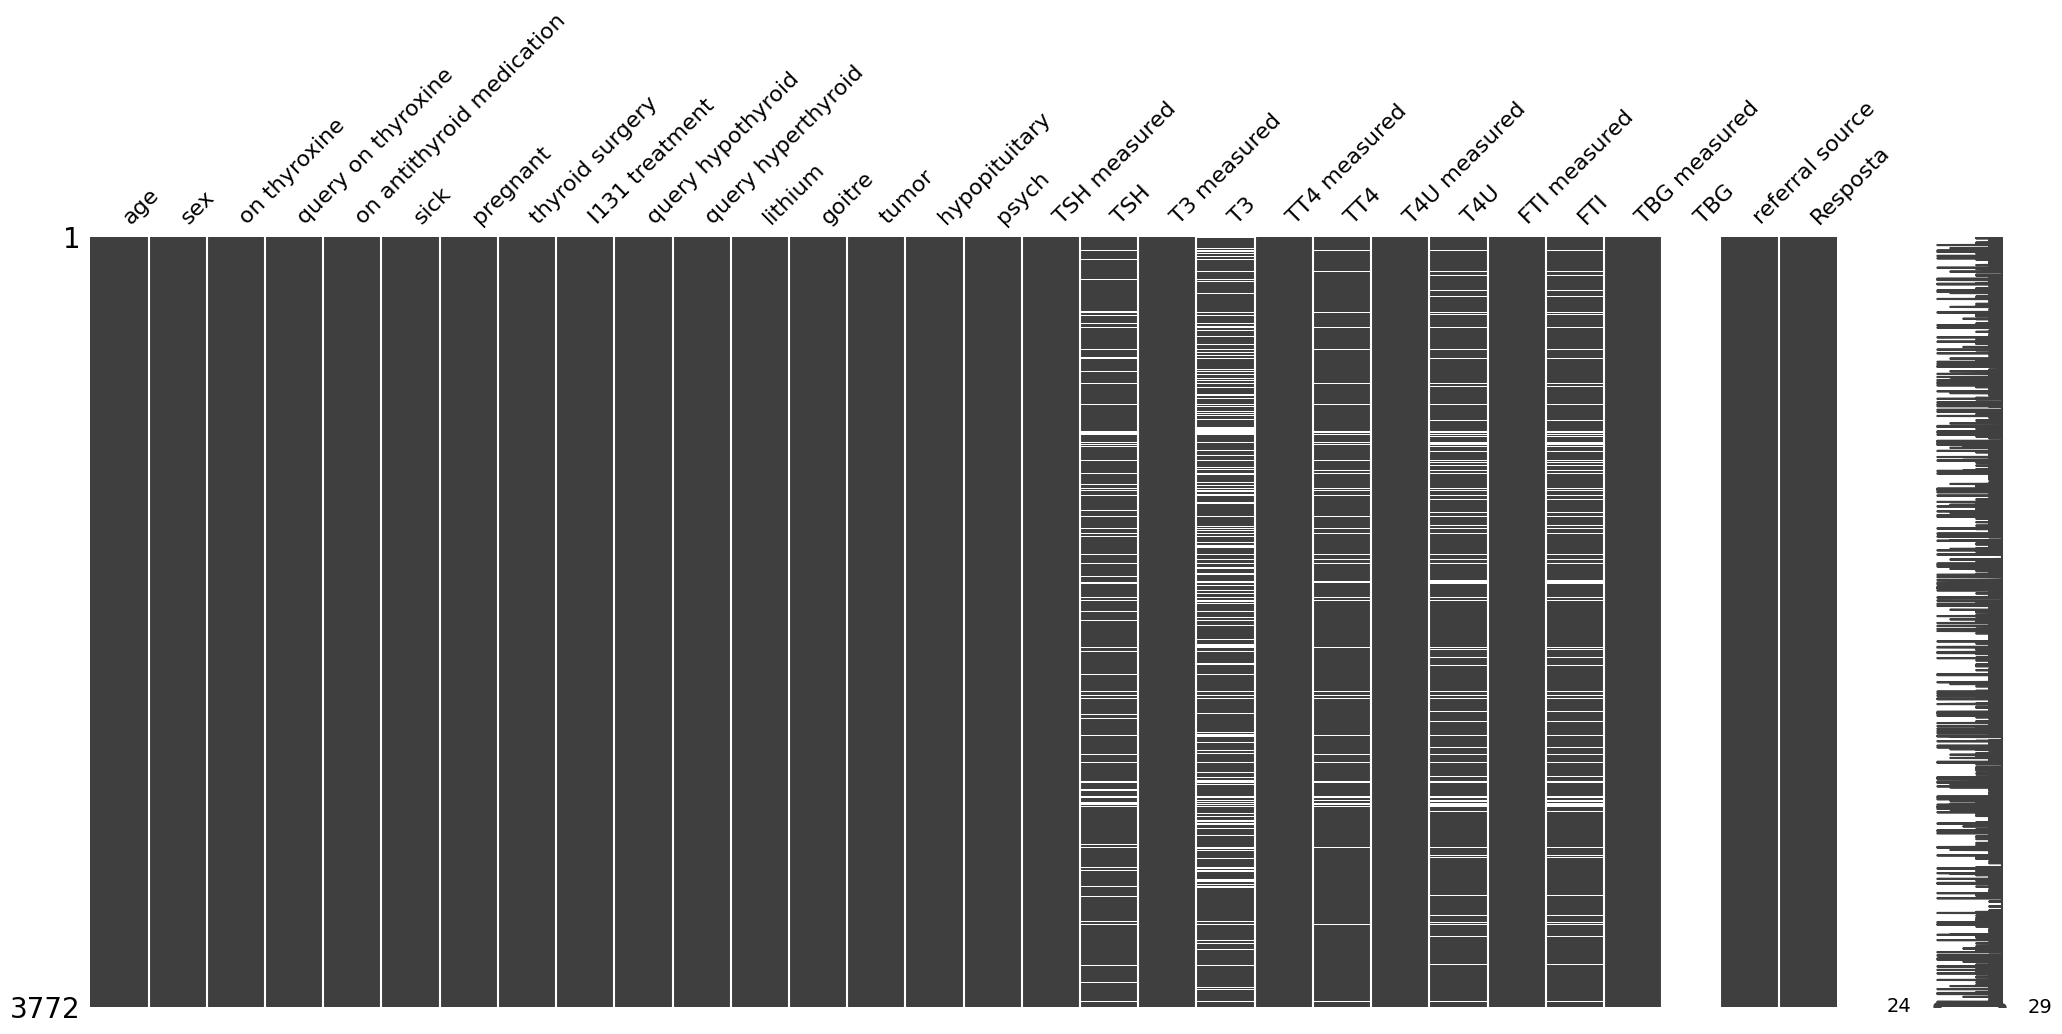

In [30]:
import missingno as msno
msno.matrix(df)

Canviem el nom de la variable resposta i la movem a la primera columna

In [32]:
df.rename(columns = {'binaryClass':'Resposta'}, inplace = True)
# print(df)
# first_column = df.pop('Resposta')
# df.insert(0, 'Resposta', first_column)
# df.describe()

Nombre concret de les variables que no tenen valor per cada "feature"

In [43]:
print(df['TSH'].isna().sum())
print(df['T3'].isna().sum())
print(df['TT4'].isna().sum())
print(df['T4U'].isna().sum())
print(df['FTI'].isna().sum())
print(df['TBG'].isna().sum())


369
769
231
387
385
3772


Decodifiquem els binaris

In [47]:
columnes = df.applymap(lambda col: isinstance(col, bytes)).all(0)
columnes = df.columns[columnes]
df.loc[:, columnes] = df[columnes].applymap(lambda col: col.decode("utf-8"))
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Resposta
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,P
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,P
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P


In [24]:
# Dividing dataframe
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=0)
X_train = train.loc[:,train.columns != 'Resposta']
y_train = train['Resposta']
X_test = test.loc[:,test.columns != 'Resposta']
y_test = test['Resposta']

train.shape, test.shape

((2640, 30), (1132, 30))

In [25]:
dummies = pd.get_dummies(df['smoker'], drop_first=True, prefix='smoker', prefix_sep='_')
train = pd.concat([df,dummies], axis=1)
train.drop(columns=['smoker'], inplace=True)

KeyError: 'smoker'